<a href="https://colab.research.google.com/github/Bala-Subramanian-G/Data-Analysis-using-Python/blob/main/KYC%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KYC analysis** of Internship students.

This dataset has been created using the google form response of students who were applying for internship at Senchola University.

Note: Since it is the realtime data i.e data of actual people. It's not good to show the details of real data as it may not be safe. So I just make some alterations like removing some sensitive columns like address and shuffling the datas in some other columns.

Note: Output of the charts that are created with plotly library is not visible in both pdf and Github versions. So Kindly run this notebook in Google Colab to be able to preview those outputs.

--> If you are running this notebook file on your own. Don't run some of the following cells. Directly go to '**Run the code Yourself**' cell and follow the instructions mentioned over there.

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [142]:
#Reading the dataset

df = pd.read_excel('/content/drive/MyDrive/Practice Datasets/Task-4 batch 1 application.xlsx')

In [143]:
# Checking the columns present in the dataset
df.columns

Index(['Date', 'Time', 'Open to learn?', 'Purpose of joining?', 'Have laptop?',
       'Name', 'Gender', 'Address', 'Qualification', 'Degree', 'Branch', 'YOP',
       'College Name', 'City', 'State', 'Domain', 'Comments',
       'Confidence Rating', 'Status'],
      dtype='object')

In [144]:
# Deleting Name, address and College Name Column as I found them sensitive informations

df.drop(['Name','Address','College Name',], axis=1,inplace=True)

In [145]:
# Shuffling the Gender Column
df['Gender'] = df['Gender'].sample(frac=1).reset_index(drop=True)

# Shuffling the Qualification, Degree and Branch Column together
df[['Qualification', 'Degree', 'Branch']] = df[['Qualification', 'Degree', 'Branch']].sample(frac=1).reset_index(drop=True)

In [146]:
df.head(4)

,Date,Time,Open to learn?,Purpose of joining?,Have laptop?,Gender,Qualification,Degree,Branch,YOP,City,State,Domain,Comments,Confidence Rating,Status
0,2023-04-04,06:48:39,Yes,To upgrade my skills,Yes,Male,Arts & Science,B.Com,Computer Application,2021,Perambalur,Tamilnadu,UI/UX Design,She doing course in chennai for QA. She lookin...,6,Next Batch
1,2023-04-05,11:24:40,Yes,I need to learn more skills about technology,Yes,Female,Arts & Science,B.Com,Computer Application,2023,Tirunelveli,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered,Data Not Entered
2,2023-04-04,10:41:49,Maybe,I have internship in the month of April to Jun...,Yes,Male,Arts & Science,M.Sc,Computer Science,2023,Namakkal,Tamilnadu,HR/Admin,Data Not Entered,Data Not Entered,Data Not Entered
3,2023-04-04,09:16:33,Yes,I am persuing my MSW in Hr. An additional inte...,Yes,Male,Arts & Science,B.Com,General,2023,Chennai,Tamilnadu,HR/Admin,did english litrature. did intership. english ...,9,We can try


In [147]:
# Removing some unwanted columns which are irrelevant to KYC Analysis

df.drop(['Purpose of joining?','Comments'], axis=1,inplace=True)

In [148]:
df.head()

,Date,Time,Open to learn?,Have laptop?,Gender,Qualification,Degree,Branch,YOP,City,State,Domain,Confidence Rating,Status
0,2023-04-04,06:48:39,Yes,Yes,Male,Arts & Science,B.Com,Computer Application,2021,Perambalur,Tamilnadu,UI/UX Design,6,Next Batch
1,2023-04-05,11:24:40,Yes,Yes,Female,Arts & Science,B.Com,Computer Application,2023,Tirunelveli,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered
2,2023-04-04,10:41:49,Maybe,Yes,Male,Arts & Science,M.Sc,Computer Science,2023,Namakkal,Tamilnadu,HR/Admin,Data Not Entered,Data Not Entered
3,2023-04-04,09:16:33,Yes,Yes,Male,Arts & Science,B.Com,General,2023,Chennai,Tamilnadu,HR/Admin,9,We can try
4,2023-04-19,11:36:46,Yes,Yes,Female,Arts & Science,B.Com,Corporate Secretaryship,2021,Hosur,Tamilnadu,Full Stack Development,Data Not Entered,Data Not Entered


In [149]:
# I am exporting the dataset for your reference, after performing alterations in the dataset.
# df.to_excel('KYC Dataset.xlsx')

[Click here](https://docs.google.com/spreadsheets/d/1uTrW6vgudnxs35iz_xKcBHBJFgDW4RpS/edit?usp=sharing&ouid=106167233124360229976&rtpof=true&sd=true) to download the dataset.

In [ ]:
# @title **Run the code Yourself**.

'''
Download the dataset. Upload that file in google drive. Copy the file path and
paste it in below code's adress box.

DONT RUN ALL THE ABOVE CELLS OR COMMENT ALL OF THEM AND JUST DECOMMENT THE FOLLOWING LINE AND RUN IT.
THEN, RUN ALL THE UPCOMING CELLS
'''

# df = pd.read_excel('<paste the file address here and run this line>')
# df.head()

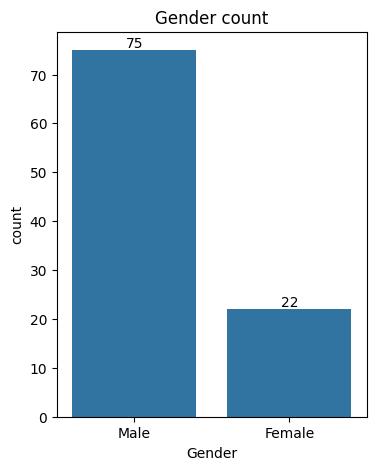

In [151]:
plt.figure(figsize=(4,5))
x=sns.countplot(df,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count")
plt.show()

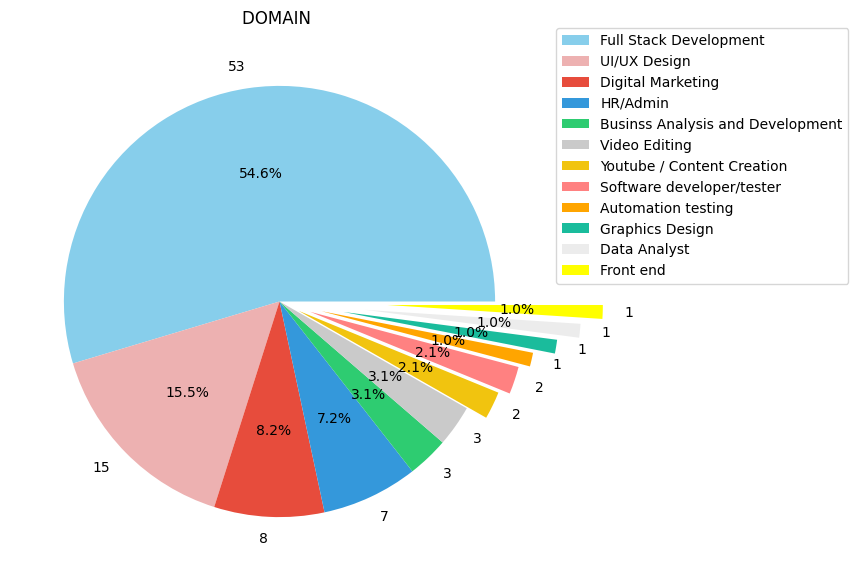

In [152]:
x=df['Domain'].value_counts()
my_explode=[0,0,0,0,0,0,0.1,.15,.2,.3,.4,.5]
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%', explode= my_explode,
        colors= ['#87CEEB','#EDB1B1','#E74C3C', '#3498DB','#2ECC71','#CACACA'
        ,'#F1C40F','#FF8181','orange','#1ABC9C','#ECECEC','yellow'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('DOMAIN ')
plt.show()

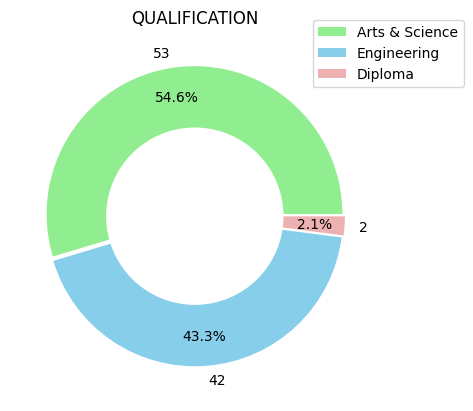

In [153]:
x=df['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1'],
        pctdistance=0.80, explode=[.015,.015,.015])

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8,1.05))
plt.title('QUALIFICATION')
plt.show()

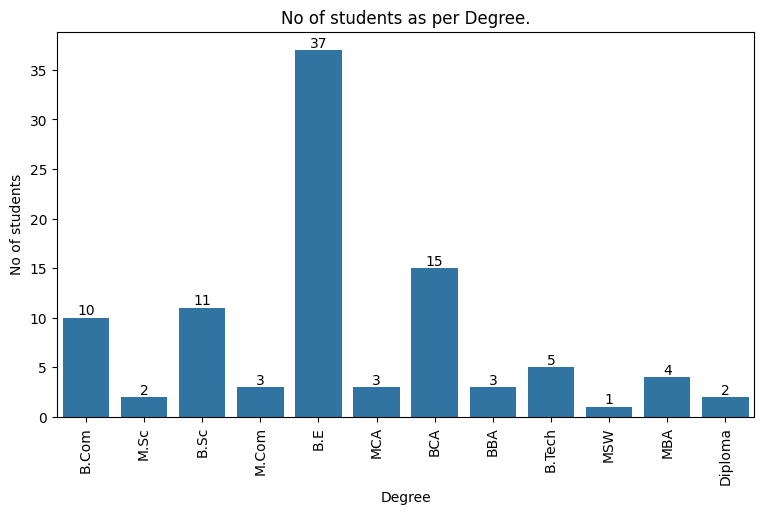

In [154]:
deg = df[df['Degree']!='Data Not Entered']
plt.figure(figsize=(9,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

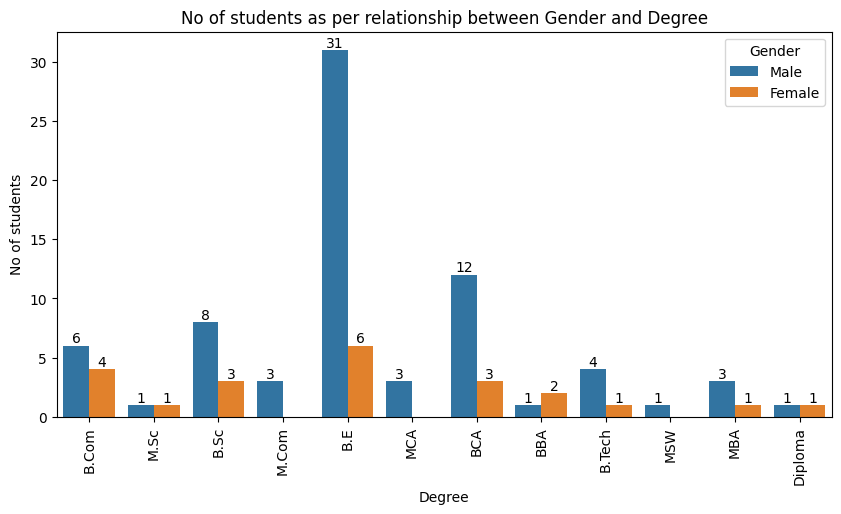

In [155]:
plt.figure(figsize=(10,5))
x=sns.countplot(data = deg, x ='Degree',hue='Gender')
for i in x.containers:
    x.bar_label(i)
plt.title("No of students as per relationship between Gender and Degree")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

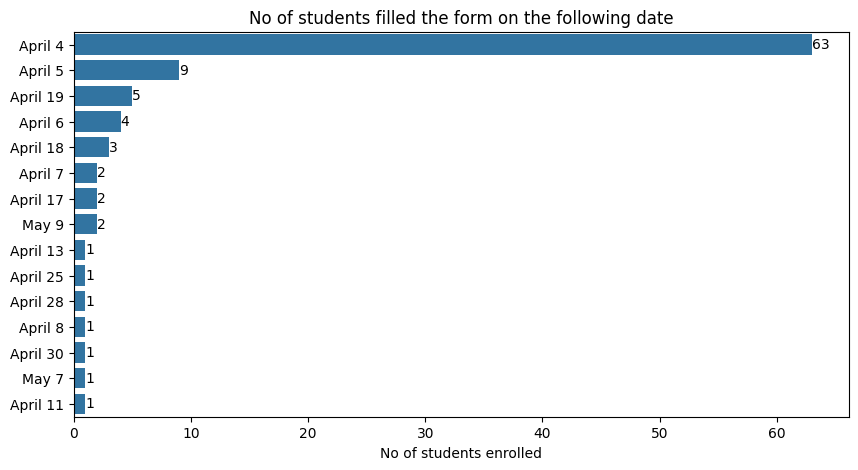

In [156]:
date_label=df['Date']  # df['Date'] is a Timestamp column
def date_in_words(s):
  date=s.day
  if s.month==4:
    month='April '
  else:
    month='May '
  return month+str(date)

date_label=date_label.apply(date_in_words)

date_in_words = pd.DataFrame({'date': date_label.unique(),
                     'students': date_label.value_counts().values})

plt.figure(figsize=(10,5))
fig = sns.barplot(data = date_in_words, x = 'students', y = 'date')

for i in fig.containers:
    fig.bar_label(i)
plt.xlabel("No of students enrolled")
plt.ylabel("")
plt.title("No of students filled the form on the following date")
plt.show(fig)

In [157]:
x=df['City'].value_counts().head()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=600, height=600,
                  title="STUDENTS FROM TOP 5 CITIES",
                  title_x=0.5, title_y=0.9, font=dict(size=16))
fig.show()

In [158]:
lap=df['Have laptop?'].value_counts()

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=lap[0],
    domain={'x': [0, 1], 'y': [0, 1]},
    title={'text': f"Students having laptop out of {df.shape[0]}"},
    gauge={'axis': {'range': [0, 100], 'dtick': 5},
           'threshold': {'line': {'color': "red", 'width': 4},
                         'thickness': 0.75, 'value': 97}}
))
fig.update_layout(width=600, height=600)
fig.show()

In [159]:
degree_5=df['Degree'].value_counts().head()

fig = go.Figure(go.Funnel(y = degree_5.axes[0], x = degree_5.values))
fig.update_layout(width=700,height=500,
                  title="No of Students enrolled from Degree (top-5)",
                  title_x=0.5, title_y=0.9)
fig.show()

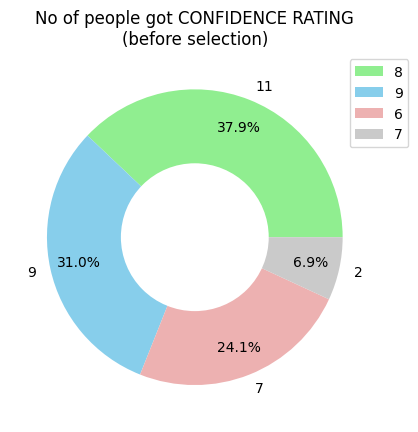

In [160]:
x=df['Confidence Rating'].value_counts().tail().head(4)

plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB','#EDB1B1','#CACACA'],
        pctdistance=0.80)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('No of people got CONFIDENCE RATING\n(before selection)')
plt.show()

#SELECTED STUDENTS VISUALISATION#

In [161]:
df_selected = df[df.Status=='Selected']

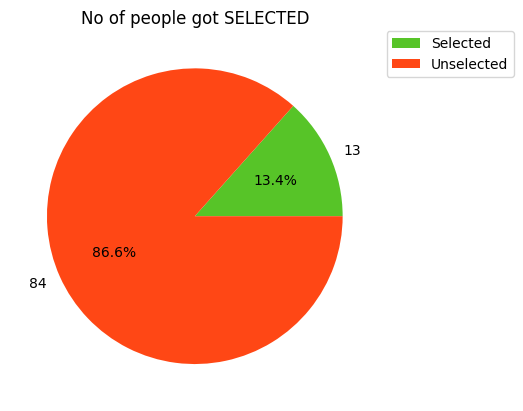

In [162]:
selected=df_selected.shape[0]
unselected=df.shape[0]-df_selected.shape[0]
x=[selected,unselected]
plt.pie(x, labels=x, autopct='%0.1f%%',
        colors=['#57C428','#FF4715'])
plt.legend(['Selected','Unselected'], loc='upper left', bbox_to_anchor=(1, 1.02))
plt.title('No of people got SELECTED')
plt.show()

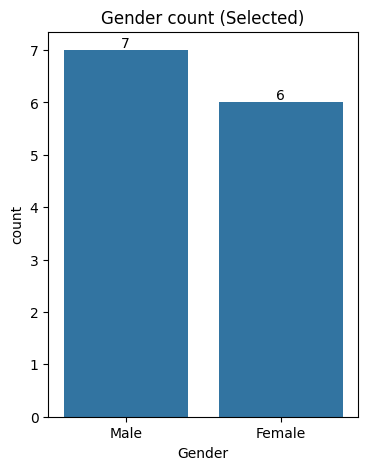

In [163]:
plt.figure(figsize=(4,5))
x=sns.countplot(df_selected,x='Gender')
for i in x.containers:
  x.bar_label(i)
plt.title("Gender count (Selected)")
plt.show()

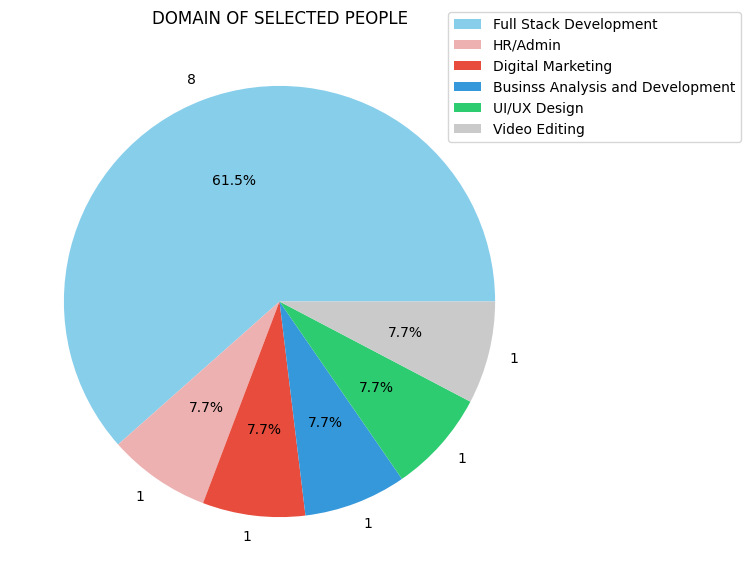

In [164]:
x=df_selected['Domain'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors= ['#87CEEB','#EDB1B1','#E74C3C',
                 '#3498DB','#2ECC71','#CACACA','#F1C40F'])
plt.legend(x.index, loc='upper left', bbox_to_anchor=(.8, 1.05))
plt.title('DOMAIN OF SELECTED PEOPLE')
plt.show()

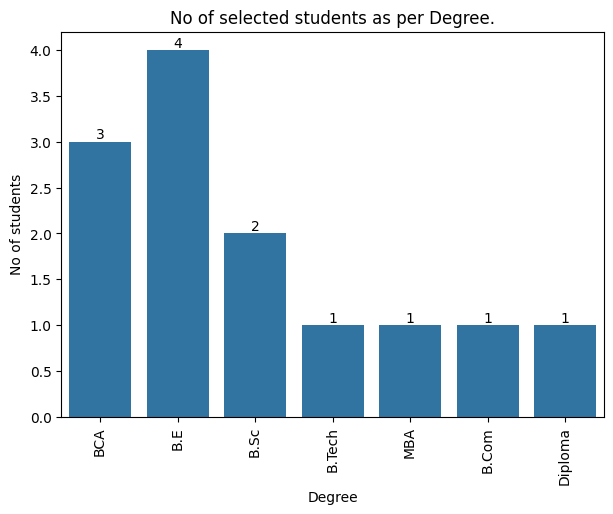

In [165]:
deg=df_selected[df_selected['Degree']!='Data Not Entered']
plt.figure(figsize=(7,5))
x=sns.countplot(data = deg, x ='Degree')
for i in x.containers:
    x.bar_label(i)
plt.title("No of selected students as per Degree.")
plt.xticks(rotation=90)
plt.ylabel('No of students')
plt.show()

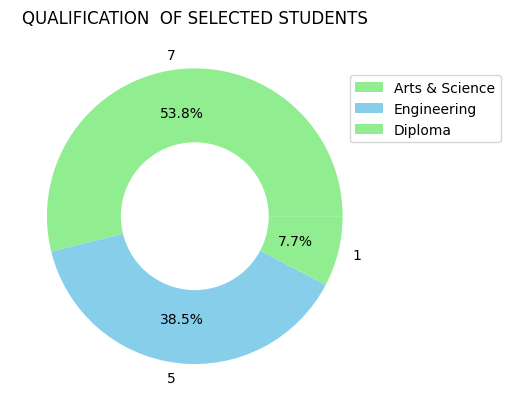

In [166]:
x=df_selected['Qualification'].value_counts()
plt.pie(x, labels=x.values, autopct='%0.1f%%',
        colors=['#90EE90','#87CEEB'],
        pctdistance=0.70)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(x.index, loc='upper left', bbox_to_anchor=(0.9,0.9))
plt.title('QUALIFICATION  OF SELECTED STUDENTS')
plt.show()

In [167]:
x=df_selected['City'].value_counts()
fig = go.Figure(go.Funnelarea(text = x.axes[0],
                              values = x.values,
                              showlegend=False))
fig.update_layout(width=700,height=700,
                  title="CITIES OF SELECTED STUDENTS",
                  title_x=0.5, title_y=0.9,
                  font=dict(size=14))
fig.show()

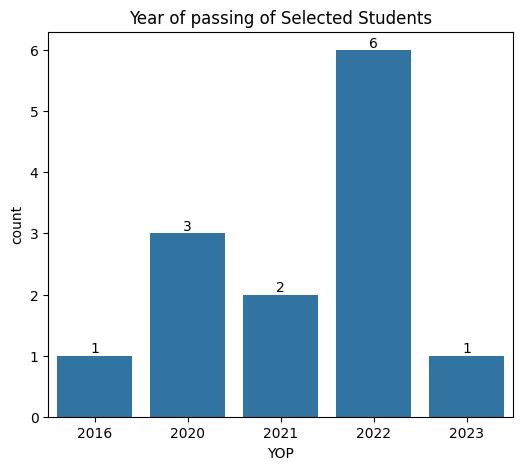

In [168]:
plt.figure(figsize=(6,5))
x=sns.countplot(df_selected,x='YOP')
for i in x.containers:
  x.bar_label(i)
plt.title("Year of passing of Selected Students")
plt.show()